In [97]:
import pandas as pd
from states import states_names, state_codes,get_state_code

In [98]:
# file paths 
file_path_race_demographics = 'us race demographcs 2017.csv'
file_path_incarcernation = '2013-2016_incarceration_usa.csv'
file_path_usa_spending = '2004-2017_usa_spending.csv'

In [99]:
# load the data 
race_demographics_2017 = pd.read_csv(file_path_race_demographics, skipfooter=1)
race_demographics_2017.head()

C:\Users\moshi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,state,hispanic,white,black,asian,indigneous
0,Mississippi,2.90%,56.60%,37.90%,0.90%,0.40%
1,Louisiana,5.20%,58.50%,32.10%,1.80%,0.50%
2,Georgia,9.60%,52.60%,31.10%,3.90%,0.20%
3,Maryland,10.10%,50.70%,29.40%,6.40%,0.20%
4,South Carolina,5.70%,63.60%,26.80%,1.50%,0.20%


In [100]:
incarceration_usa = pd.read_csv(file_path_incarcernation)
incarceration_usa = incarceration_usa[incarceration_usa['region'] != 'District of Columbia']
incarceration_usa = incarceration_usa[incarceration_usa['region'] != 'District of Columbia/g']
incarceration_usa_na = incarceration_usa[incarceration_usa['status_code'].isna()]

def replace_broke(name):
    if name == 'Oklahoma/g':
        return 'Oklahoma'
    elif name == 'Georgia/h':
        return 'Georgia'
    elif name == 'Idaho/i':
        return 'Idaho'
    else:
        return name
    
incarceration_usa['region'] = incarceration_usa['region'].apply(replace_broke)
incarceration_usa['status_code'] = incarceration_usa.apply(get_state_code, axis=1)
incarceration_usa = incarceration_usa[incarceration_usa['status_code'].notna()]
incarceration_usa = incarceration_usa[['region','total_correctional_pop', 'year']]
incarceration_usa

,region,total_correctional_pop,year
0,Alabama,115600,2013
1,Alaska,14600,2013
2,Arizona,132300,2013
3,Arkansas,69900,2013
4,California,600400,2013
...,...,...,...
198,Virginia,120000,2016
199,Washington,127000,2016
200,West Virginia,20100,2016
201,Wisconsin,100500,2016


In [101]:
incarceration_usa_na

,Unnamed: 0,region,total_correctional_pop,csrp_100k_18,csrp_100k_all,parole,comsrp_100k_18,comsrp_100k_all,local_jail_prison,irp_100k_18,irp_100k_all,year,status_code
36,39,Oklahoma/g,67700,2320,0,37900,1300,0,0,0,0,2013,NaN
61,13,Georgia/h,579600,7580,491800,91000,1190,0,0,0,0,2014,NaN
63,15,Idaho/i,48600,4010,37700,11000,910,0,0,0,0,2014,NaN
112,14,Georgia/g,540000,6960,5260,5820,4400,88500,860,0,0,2015,NaN
138,40,Oklahoma/g,73100,2460,1860,1130,850,39700,1010,0,0,2015,NaN
162,13,Georgia/g,0,0,0,0,0,0,91400,1160,0,2016,NaN
188,39,Oklahoma/g,74500,2510,1890,35500,1190,900,39000,1310,0,2016,NaN


In [102]:
usa_spending = pd.read_csv(file_path_usa_spending)
usa_spending.head()

,Unnamed: 0,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code
0,0,New England,10298.381836,2384.092773,827.528137,2475.590088,471.540283,604.353638,349.032532,3186.245117,14802.966797,2017,NaN
1,1,Connecticut,9489.362305,2618.455811,951.317871,1068.116455,699.329285,636.851562,329.711395,3185.579590,3573.879883,2017,CT
2,2,Maine,8702.747070,1918.233154,585.997803,2394.213623,342.019073,740.267700,232.486404,2489.529785,1335.062988,2017,ME
3,3,Massachusetts,11303.453125,2366.159180,807.502441,3241.724609,458.939697,557.854370,376.664917,3494.607910,6863.246094,2017,MA
4,4,New Hampshire,8222.321289,2201.690430,696.538757,1805.527954,131.633835,561.107239,311.410034,2514.413086,1349.766968,2017,NH


In [103]:
# remove non states from usa_spending
usa_spending_states = usa_spending[usa_spending['status_code'].notna()]
usa_spending_states.drop(usa_spending_states.columns[0], axis=1, inplace=True)

def get_based_on_year():
    years = [2014, 2015, 2016]
    df_2013 = usa_spending_states[usa_spending_states['year'] == 2013]
    for year in years:
        df_2013 = df_2013.append(usa_spending_states[usa_spending_states['year'] == year], sort=False,)
    return df_2013
        
usa_spending_states = get_based_on_year()
usa_spending_states.tail()

C:\Users\moshi\anaconda3\envs\spark\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code
111,Nevada,6945.492188,1447.046875,482.559265,1222.381714,446.476654,592.626770,404.417877,2349.983154,2919.771973,2016,NV
112,Oregon,10642.423828,1746.444336,1224.093140,2508.636230,1018.182312,511.481873,321.533386,3312.053223,4091.404053,2016,OR
113,Washington,9640.853516,2039.134155,973.063904,1614.666260,1244.145752,579.649719,287.100861,2903.093018,7294.680176,2016,WA
114,Alaska,18398.335938,3191.602539,1473.978638,3019.365967,952.876831,2144.518311,496.517883,7119.474609,741.504028,2016,AK
115,Hawaii,9598.970703,1486.096558,777.426025,1989.537842,818.009888,511.060455,320.591980,3696.247803,1428.104980,2016,HI


In [104]:
# remove % from the end of race 
def remove_percent(n):
    return float(str(n).replace('%',''))

def remove_from_df(df):
    races = ['hispanic','white', 'black', 'asian','indigneous']
    for name in races:
        df[name] = df[name].map(remove_percent)
    return df

race_demographics_2017_cleaned = remove_from_df(race_demographics_2017)
race_demographics_2017_cleaned.head()

,state,hispanic,white,black,asian,indigneous
0,Mississippi,2.9,56.6,37.9,0.9,0.4
1,Louisiana,5.2,58.5,32.1,1.8,0.5
2,Georgia,9.6,52.6,31.1,3.9,0.2
3,Maryland,10.1,50.7,29.4,6.4,0.2
4,South Carolina,5.7,63.6,26.8,1.5,0.2


In [105]:
# check rows 
print(race_demographics_2017_cleaned.shape)
print(usa_spending_states.shape) # makes sense
print(incarceration_usa.shape) # missing 3

(50, 6)
(200, 12)
(197, 3)


In [106]:
# join the datasets 
race_df = pd.concat([race_demographics_2017_cleaned,race_demographics_2017_cleaned,
                     race_demographics_2017_cleaned,race_demographics_2017_cleaned],ignore_index=True)
race_df.rename(columns={'state':'region'}, inplace=True)
race_df.shape

(200, 6)

In [107]:
race_spending = pd.merge(usa_spending_states, race_df, on='region')
race_spending.drop_duplicates(inplace=True)
print(race_spending.shape)
race_spending

(200, 17)


,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code,hispanic,white,black,asian,indigneous
0,Connecticut,9429.969727,2406.116699,726.015503,1729.546021,575.013611,600.278748,311.752289,3081.246338,3594.915039,2013,CT,16.1,66.7,9.9,4.5,0.2
4,Connecticut,9964.010742,2471.669922,809.271667,1903.366943,603.080322,631.556335,316.289459,3228.775879,3594.782959,2014,CT,16.1,66.7,9.9,4.5,0.2
8,Connecticut,9366.493164,2557.038818,870.307190,1045.734497,637.711304,656.718323,326.854919,3272.128174,3587.509033,2015,CT,16.1,66.7,9.9,4.5,0.2
12,Connecticut,9717.144531,2636.657959,940.940674,1076.932983,657.802002,718.704468,349.105286,3337.001221,3578.674072,2016,CT,16.1,66.7,9.9,4.5,0.2
16,Maine,8253.356445,1684.847656,596.058105,2294.156982,370.811981,691.873779,193.318604,2422.289307,1328.196045,2013,ME,1.6,93.4,1.2,1.1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,Alaska,18398.335938,3191.602539,1473.978638,3019.365967,952.876831,2144.518311,496.517883,7119.474609,741.504028,2016,AK,7.0,60.6,2.9,6.6,14.2
784,Hawaii,8938.643555,1323.810547,1001.661377,1550.371216,768.831482,490.068878,272.991730,3530.908691,1408.453003,2013,HI,10.5,21.8,1.6,37.3,0.1
788,Hawaii,9481.196289,1502.669556,801.227234,1931.991943,900.914001,527.262756,318.866425,3498.264160,1414.862061,2014,HI,10.5,21.8,1.6,37.3,0.1
792,Hawaii,9179.965820,1387.520752,760.864807,1853.413452,831.271912,490.683197,320.606781,3535.604492,1422.484009,2015,HI,10.5,21.8,1.6,37.3,0.1


In [144]:
# join with the incarceratin data 
final_df = pd.merge(race_spending,incarceration_usa, left_on=['region','year'], right_on=['region','year'])
final_df.drop_duplicates(inplace=True)
final_df = final_df.sample(frac=1).reset_index(drop=True)
print(final_df.shape)
# this is for the visual
# final_df['total_correctional_pop'] = (final_df['total_correctional_pop']/final_df['population_thousands']) * 100
final_df
# TOTAL IS NOW IN PER 100K
final_df.to_csv('final_df_with_spending_race_incarceration.csv')

(197, 18)


In [109]:
# start model 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [110]:
final_df.tail()

,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code,hispanic,white,black,asian,indigneous,total_correctional_pop
192,Oregon,10138.731445,1655.677612,1065.482544,2471.581299,930.029968,512.404053,302.729370,3200.825928,4016.917969,2015,OR,13.1,75.6,1.8,4.3,0.9,82900
193,North Dakota,10298.117188,1994.374023,1358.622437,1449.413452,297.489319,1849.275391,217.262070,3131.680176,721.999023,2013,ND,3.5,84.4,3.0,1.7,5.4,8100
194,New York,12724.108398,3109.124512,761.881409,2786.849121,1089.133545,536.499634,477.522766,3963.096680,19656.330078,2014,NY,19.2,55.1,14.3,8.7,0.2,222100
195,Minnesota,9251.651367,1970.159912,857.839539,2368.952637,578.370239,772.996948,319.292847,2384.039062,5451.521973,2014,MN,5.3,79.9,6.4,4.9,1.0,120500
196,Indiana,7422.424316,1477.751831,887.087402,1753.764404,859.328186,413.757660,181.794662,1848.940552,6608.295898,2015,IN,6.9,79.2,9.2,2.2,0.1,166000


In [111]:
final_df.isna().sum()

region                          0
total                           0
elementary_and_secondary_edu    0
higher_edu                      0
public_welfare                  0
health_and_hospitals            0
highways                        0
police                          0
all_other                       0
population_thousands            0
year                            0
status_code                     0
hispanic                        0
white                           0
black                           0
asian                           0
indigneous                      0
total_correctional_pop          0
dtype: int64

In [112]:
# since the state column is really categorical, we will convert to one-hot
# def generate_mappings_states():
#     mappings = {}
#     for num in range(1, len(states_names) + 1):
#         mappings[num] = states_names[num-1]
#     return mappings

# one_hot = generate_mappings_states()
# print(one_hot)
# final_df['region'] = final_df['region'].map(one_hot)
# final_df = pd.get_dummies(final_df, prefix='', prefix_sep='')
# final_df.tail()

# for now remove states 
final_df.drop(final_df.columns[0], axis=1, inplace=True)
final_df.drop(final_df.columns[10], axis=1, inplace=True)
final_df.isna().sum()

total                           0
elementary_and_secondary_edu    0
higher_edu                      0
public_welfare                  0
health_and_hospitals            0
highways                        0
police                          0
all_other                       0
population_thousands            0
year                            0
hispanic                        0
white                           0
black                           0
asian                           0
indigneous                      0
total_correctional_pop          0
dtype: int64

In [113]:
# split the data into train and test 
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(final_df, test_size=0.2)
train_dataset = train_dataset.sample(frac=1).reset_index(drop=True)
test_dataset = test_dataset.sample(frac=1).reset_index(drop=True)

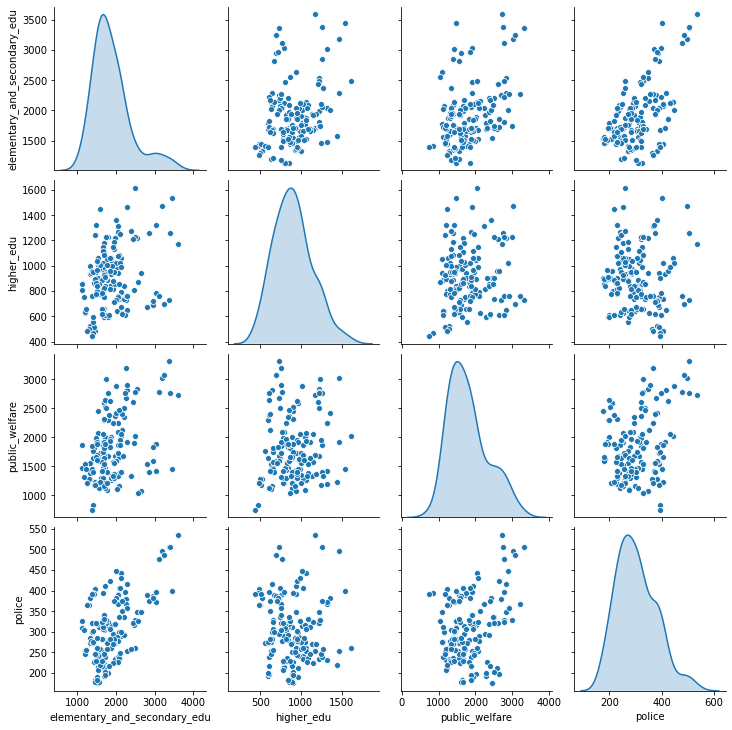

In [114]:
sns.pairplot(train_dataset[["elementary_and_secondary_edu", "higher_edu", "public_welfare", "police"]], diag_kind="kde")

In [115]:
train_stats = train_dataset.describe()
train_stats.pop("total_correctional_pop")
train_stats = train_stats.transpose()
train_stats.to_csv('stats_for_norm.csv')

In [116]:
# split features from labels
train_labels = train_dataset.pop('total_correctional_pop')
test_labels = test_dataset.pop('total_correctional_pop')

In [117]:
# normalising the data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = train_dataset
normed_test_data = test_dataset

In [118]:
# build the model 
import os

def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'accuracy'])
    
    return model

checkpoint_path = "hack-for-people/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1)

In [119]:
model = build_model()

In [120]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1024      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [121]:
# import tensorflow_docs as tfdocs
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [122]:
# early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [123]:
early_history = model.fit(normed_train_data, train_labels, 
                    epochs=1000, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, cp_callback],
                         batch_size=100,)


Epoch 00001: saving model to hack-for-people\cp.ckpt

Epoch 00002: saving model to hack-for-people\cp.ckpt

Epoch 00003: saving model to hack-for-people\cp.ckpt

Epoch 00004: saving model to hack-for-people\cp.ckpt

Epoch 00005: saving model to hack-for-people\cp.ckpt

Epoch 00006: saving model to hack-for-people\cp.ckpt

Epoch 00007: saving model to hack-for-people\cp.ckpt

Epoch 00008: saving model to hack-for-people\cp.ckpt

Epoch 00009: saving model to hack-for-people\cp.ckpt

Epoch 00010: saving model to hack-for-people\cp.ckpt

Epoch 00011: saving model to hack-for-people\cp.ckpt

Epoch 00012: saving model to hack-for-people\cp.ckpt

Epoch 00013: saving model to hack-for-people\cp.ckpt

Epoch 00014: saving model to hack-for-people\cp.ckpt

Epoch 00015: saving model to hack-for-people\cp.ckpt

Epoch 00016: saving model to hack-for-people\cp.ckpt

Epoch 00017: saving model to hack-for-people\cp.ckpt

Epoch 00018: saving model to hack-for-people\cp.ckpt

Epoch 00019: saving model t

In [124]:
!dir {checkpoint_dir}

 Volume in drive C has no label.
 Volume Serial Number is 001E-4AA5

 Directory of C:\Users\moshi\Codes\hack-for-people\hack-for-people

2020-08-23  07:29 AM    <DIR>          .
2020-08-23  07:29 AM    <DIR>          ..
2020-08-23  07:29 AM                71 checkpoint
2020-08-23  07:29 AM            44,121 cp.ckpt.data-00000-of-00001
2020-08-23  07:29 AM             1,273 cp.ckpt.index
               3 File(s)         45,465 bytes
               2 Dir(s)  350,518,558,720 bytes free


In [125]:
loss, mae, mse, accuracy = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

2/2 - 0s - loss: 8452752384.0000 - mae: 45023.8594 - mse: 8452752384.0000 - accuracy: 0.0000e+00
Testing set Mean Abs Error: 45023.86 MPG


dict_keys(['loss', 'mae', 'mse', 'accuracy', 'val_loss', 'val_mae', 'val_mse', 'val_accuracy'])


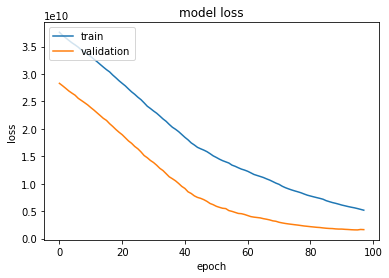

In [126]:
print(early_history.history.keys())
# "Loss"
plt.plot(early_history.history['loss'])
plt.plot(early_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# # MSE
# plt.plot(early_history.history['mse'])
# plt.plot(early_history.history['val_mse'])
# plt.title('model mse')
# plt.ylabel('mse')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
# # mae
# plt.plot(early_history.history['mae'])
# plt.plot(early_history.history['val_mae'])
# plt.title('model mae')
# plt.ylabel('mae')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [127]:
test_predictions = model.predict(normed_test_data).flatten()

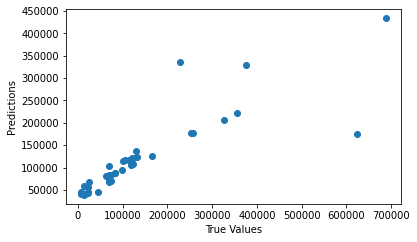

In [128]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [129]:
model_two = build_model()

In [130]:
model_two.load_weights(checkpoint_path)

loss, mae, mse, accuracy = model_two.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

2/2 - 0s - loss: 8452752384.0000 - mae: 45023.8594 - mse: 8452752384.0000 - accuracy: 0.0000e+00
Testing set Mean Abs Error: 45023.86 MPG


In [131]:
normed_test_data

,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,hispanic,white,black,asian,indigneous
0,11595.634766,2579.171875,1398.058838,3013.036377,620.842957,964.372314,333.855530,2686.297119,623.643982,2016,1.9,92.8,1.2,1.8,0.3
1,10138.731445,1655.677612,1065.482544,2471.581299,930.029968,512.404053,302.729370,3200.825928,4016.917969,2015,13.1,75.6,1.8,4.3,0.9
2,6584.645508,1408.019653,577.202454,1578.023560,616.560791,363.784332,272.757751,1768.296753,6540.826172,2014,5.4,73.9,16.6,1.8,0.2
3,10470.541016,2054.034180,1330.353760,2545.734619,596.188843,617.455872,373.381805,2953.392090,949.216003,2016,9.3,62.2,21.5,4.0,0.2
4,9251.778320,1849.792114,917.280029,1612.628052,1196.377808,583.465881,278.677460,2813.557129,7163.542969,2015,12.7,68.6,3.5,8.5,1.0
5,8848.776367,1920.020142,1090.409058,2122.076904,638.894470,657.607422,328.157257,2091.610840,5772.958008,2016,6.9,81.2,6.3,2.7,0.8
6,6356.278320,1124.122437,764.610229,1257.016846,531.846497,342.075562,307.977600,2028.629150,6634.999023,2013,31.4,54.7,4.1,3.2,3.9
7,7422.424316,1477.751831,887.087402,1753.764404,859.328186,413.757660,181.794662,1848.940552,6608.295898,2015,6.9,79.2,9.2,2.2,0.1
8,10243.411133,2214.206787,920.149475,2758.751953,595.165955,900.778687,345.490448,2508.867920,5523.409180,2016,5.3,79.9,6.4,4.9,1.0
9,9429.969727,2406.116699,726.015503,1729.546021,575.013611,600.278748,311.752289,3081.246338,3594.915039,2013,16.1,66.7,9.9,4.5,0.2


In [132]:
test_dataset

,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,hispanic,white,black,asian,indigneous
0,11595.634766,2579.171875,1398.058838,3013.036377,620.842957,964.372314,333.855530,2686.297119,623.643982,2016,1.9,92.8,1.2,1.8,0.3
1,10138.731445,1655.677612,1065.482544,2471.581299,930.029968,512.404053,302.729370,3200.825928,4016.917969,2015,13.1,75.6,1.8,4.3,0.9
2,6584.645508,1408.019653,577.202454,1578.023560,616.560791,363.784332,272.757751,1768.296753,6540.826172,2014,5.4,73.9,16.6,1.8,0.2
3,10470.541016,2054.034180,1330.353760,2545.734619,596.188843,617.455872,373.381805,2953.392090,949.216003,2016,9.3,62.2,21.5,4.0,0.2
4,9251.778320,1849.792114,917.280029,1612.628052,1196.377808,583.465881,278.677460,2813.557129,7163.542969,2015,12.7,68.6,3.5,8.5,1.0
5,8848.776367,1920.020142,1090.409058,2122.076904,638.894470,657.607422,328.157257,2091.610840,5772.958008,2016,6.9,81.2,6.3,2.7,0.8
6,6356.278320,1124.122437,764.610229,1257.016846,531.846497,342.075562,307.977600,2028.629150,6634.999023,2013,31.4,54.7,4.1,3.2,3.9
7,7422.424316,1477.751831,887.087402,1753.764404,859.328186,413.757660,181.794662,1848.940552,6608.295898,2015,6.9,79.2,9.2,2.2,0.1
8,10243.411133,2214.206787,920.149475,2758.751953,595.165955,900.778687,345.490448,2508.867920,5523.409180,2016,5.3,79.9,6.4,4.9,1.0
9,9429.969727,2406.116699,726.015503,1729.546021,575.013611,600.278748,311.752289,3081.246338,3594.915039,2013,16.1,66.7,9.9,4.5,0.2


In [133]:
import pandas as pd
from states import states_names

def generate_mappings_states():
    mappings = {}
    for num in range(1, len(states_names) + 1):
        mappings[num] = states_names[num-1]
    return mappings

def norm(x):
    norm = pd.read_csv('stats_for_norm.csv')
    return (x - norm['mean']) / norm['std']

def to_dataframe(input_raw):
    # inputs should be dict or list
    vals = ['total','elementary_and_secondary_edu','higher_edu' ,
            'public_welfare','health_and_hospitals','highways',
            'police','all_other','population_thousands',
            'year','hispanic','white',
            'black','asian','indigneous']
    
    dict_to_df = dict(zip(vals, list(input_raw)))
    for key,val in dict_to_df.items():
        dict_to_df[key] = [val]
    # turn inputs into pandas dataframe
    df = pd.DataFrame.from_dict(dict_to_df)
    
     # one hot encode 
#     one_hot = generate_mappings_states()
#     df['region'] = df['region'].map(one_hot)
#     df = pd.get_dummies(df, prefix='', prefix_sep='')

    # normalise 
    norm_df = norm(df)
    print(df)

    # return 
    return df

test = [9429.969727,2406.116699,726.015503,1729.546021,575.013611,600.278748,311.752289,3081.246338,3594.915039,2013,16.1,40.0,36.6,4.5,0.2]
pandas_df = to_dataframe(test)
print(pandas_df)

         total  elementary_and_secondary_edu  higher_edu  public_welfare  \
0  9429.969727                   2406.116699  726.015503     1729.546021   

   health_and_hospitals    highways      police    all_other  \
0            575.013611  600.278748  311.752289  3081.246338   

   population_thousands  year  hispanic  white  black  asian  indigneous  
0           3594.915039  2013      16.1   40.0   36.6    4.5         0.2  
         total  elementary_and_secondary_edu  higher_edu  public_welfare  \
0  9429.969727                   2406.116699  726.015503     1729.546021   

   health_and_hospitals    highways      police    all_other  \
0            575.013611  600.278748  311.752289  3081.246338   

   population_thousands  year  hispanic  white  black  asian  indigneous  
0           3594.915039  2013      16.1   40.0   36.6    4.5         0.2  


In [134]:
pandas_df

,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,hispanic,white,black,asian,indigneous
0,9429.969727,2406.116699,726.015503,1729.546021,575.013611,600.278748,311.752289,3081.246338,3594.915039,2013,16.1,40.0,36.6,4.5,0.2


In [135]:
train_dataset

,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,hispanic,white,black,asian,indigneous
0,8228.345703,1785.058228,1018.443604,1680.550171,621.964600,733.094666,314.806549,2074.427490,5736.952148,2013,6.9,81.2,6.3,2.7,0.8
1,7563.738770,1481.008057,1324.727173,1201.191040,702.101318,531.191833,230.525635,2092.993896,2982.497070,2015,14.0,78.3,1.2,2.4,1.0
2,8253.356445,1684.847656,596.058105,2294.156982,370.811981,691.873779,193.318604,2422.289307,1328.196045,2013,1.6,93.4,1.2,1.1,0.6
3,9145.557617,1987.995239,1217.921875,1670.821777,1196.732300,781.587341,233.577774,2056.920898,3109.503906,2014,5.9,85.9,3.3,2.6,0.2
4,8862.685547,1685.640503,958.231567,2592.865723,417.436707,698.540466,211.770096,2298.200439,1830.928955,2016,1.3,92.0,3.9,0.8,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,9000.508789,2377.051270,1275.855713,1339.165649,626.871277,832.238831,258.772644,2290.552979,1905.923950,2016,10.9,79.0,4.5,2.4,0.7
153,9314.184570,2168.787109,616.086670,2402.834473,268.304382,450.406555,375.389801,3032.375488,1056.016968,2014,15.4,72.1,5.4,3.6,0.3
154,9523.832031,2081.896484,855.816956,2474.373047,568.789490,803.266663,335.684631,2404.005127,5482.502930,2015,5.3,79.9,6.4,4.9,1.0
155,10605.564453,2279.402100,757.901489,2901.685791,405.263428,582.317627,357.027496,3321.966309,6795.891113,2015,11.8,71.5,7.0,6.6,0.1


In [136]:
test_predictions_two = model_two.predict(pandas_df).flatten()

In [137]:
print(test_predictions_two)

[82056.81]


In [141]:
listt = [7991.245605,1681.732666,827.223572,1558.236084,1478.948486,322.951813,235.153625,1886.999268,4892.252930,2015,5.7,63.6,26.8,1.5, 0.2]
list_2 = [7048.2177734375,1326.36962890625,523.4403076171875,1281.68359375,675.7946166992188,500.2290649414063,381.4692687988281,2359.2314453125,20629.982421875,25.6,53.8,15.4,2.8,0.2]
print(len(listt))


15


In [139]:
1120267 - 70100

1050167